In [1]:
import sys
sys.path.insert(0, './ml')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml.gs_svm import grid_search
from ml.SVM_RF import run as run_model

from features.spatial_features_calc import get_spatial_features_names
from features.morphological_features_calc import get_morphological_features_names
from features.temporal_features_calc import get_temporal_features_names

In [2]:
chunks = [0, 500, 200]
modalities = ['spatial', 'morphological', 'temporal']
restrictions = ['complete', 'no_noise', 'no_small_sample', 'no_noise_nor_ss']

min_gamma = -9
max_gamma = -1
num_gamma = 9
min_c = 0
max_c = 6
num_c = 7
kernel = 'rbf'
n = 5

In [3]:
def get_modality_results(data_path):
    accs, pyr_accs, in_accs = [], [], []
    
    _, acc, pyr_acc, in_acc, C, gamma = grid_search(data_path + "/0_0.60.20.2/", False, None, min_gamma,
                                                    max_gamma, num_gamma, min_c, max_c, num_c, kernel, n)
    accs.append(acc)
    pyr_accs.append(pyr_acc)
    in_accs.append(in_acc)
    
    restriction, modality = data_path.split('/')[-2:]
    
    if modality == 'temporal':
        accs = accs * len(chunks)
        pyr_accs = pyr_accs * len(chunks)
        in_accs = in_accs * len(chunks)
    else:
        for chunk_size in chunks[1:]:
            _, acc, pyr_acc, in_acc = run_model('svm', None, None, None, False, None, False, True, False, gamma, C, 'rbf',
                None, None, None, None, data_path + f"/{chunk_size}_0.60.20.2/")
            accs.append(acc)
            pyr_accs.append(pyr_acc)
            in_accs.append(in_acc)
        
        
    df = pd.DataFrame({'restriction': restriction, 'modality': modality, 'chunk_size': chunks,
                           'accs': accs, 'pyr_accs': pyr_accs, 'in_accs': in_accs})
    
    return df
                                       
def get_folder_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for modality in modalities:
        modaility_df = get_modality_results(data_path + '/' + modality)
        df = df.append(modaility_df, ignore_index=True)
        
    return df

def get_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for restriction in restrictions:
        folder_df = get_folder_results(data_path + '/' + restriction)
        df = df.append(folder_df, ignore_index=True)
        
    return df    

In [4]:
results = get_results('./data_sets')

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 325 waveforms (61.321%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 264 waveforms (81.231%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 61 waveforms (18.769%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 76 waveforms (14.340%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting of 56 waveforms (73.684%)
Total number of interneurons clusters in dev data is 20 (26.316%) consisting of 20 waveforms (26.316%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 129 (24.340%) consisting of 129 waveforms (24.340%)
Total number of pyramidal clusters in test data is 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.802, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .

[CV] .................. C=10.0, gamma=0.01, score=0.825, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.875, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.887, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.926, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.912, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.938, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.863, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-08, score=0.200, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.802, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.877, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-05, score=0.838, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.900, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.875, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.877, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.825, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.863, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.887, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] .

[CV] .............. C=100000.0, gamma=0.01, score=0.914, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.838, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.912, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.863, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.875, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.901, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.900, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   11.1s finished


Fitting took 24.57 seconds
Evaluating predictions...
Number of correct classified clusters is 115, which is 89.1473%
Number of correct classified chunks is 11695, which is 93.1947%
Test set consists of 100 pyramidal cells and 29 interneurons
89.0000% of pyramidal cells classified correctly
89.6552% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/complete/spatial/200_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 68387 waveforms (53.366%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 23691 waveforms (34.643%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 44696 waveforms (65.357%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 28293 waveforms (22.078%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.975, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.975, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-08, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.975, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] .

[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.988, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.938, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.988, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.975, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.975, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.988, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.950, total=   0.0s
[CV] C

[CV] ............. C=100000.0, gamma=1e-08, score=0.950, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.975, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.963, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.963, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.975, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.950, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] ............. C=100000.0, gamma=1e-06, score=0.975, total=   0.0s
[CV] C=100000.0, gamma=1e-06 .........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-05, score=0.975, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.988, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.925, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.988, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.950, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.963, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.988, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    4.3s finished


Fitting took 11.96 seconds
Evaluating predictions...
Number of correct classified clusters is 124, which is 96.1240%
Number of correct classified chunks is 11015, which is 87.7759%
Test set consists of 100 pyramidal cells and 29 interneurons
96.0000% of pyramidal cells classified correctly
96.5517% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/complete/morphological/200_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 68387 waveforms (53.366%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 23691 waveforms (34.643%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 44696 waveforms (65.357%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 28293 waveforms (22.078%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.667, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.200, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.667, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.200, total=   0.0s
[CV] C

[CV] ................ C=100.0, gamma=1e-09, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.667, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.200, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=0.001, score=0.812, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.840, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.875, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.950, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.950, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.825, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.889, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] .

[CV] ............. C=100000.0, gamma=1e-05, score=0.787, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.815, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.850, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.925, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.912, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.800, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.815, total=   0.1s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] .

[CV] ............. C=1000000.0, gamma=0.01, score=0.950, total=   2.3s
[CV] C=1000000.0, gamma=0.01 .........................................
[CV] ............. C=1000000.0, gamma=0.01, score=0.950, total=   1.4s
[CV] C=1000000.0, gamma=0.01 .........................................
[CV] ............. C=1000000.0, gamma=0.01, score=0.825, total=   0.9s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .............. C=1000000.0, gamma=0.1, score=0.914, total=   0.1s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .............. C=1000000.0, gamma=0.1, score=0.938, total=   0.1s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .............. C=1000000.0, gamma=0.1, score=0.950, total=   0.1s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .............. C=1000000.0, gamma=0.1, score=0.963, total=   0.1s
[CV] C=1000000.0, gamma=0.1 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



Starting evaluation on test set...
Loading data set from ./data_sets/no_noise/spatial/0_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 317 waveforms (61.079%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 257 waveforms (81.073%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 60 waveforms (18.927%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 75 waveforms (14.451%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consisting of 56 waveforms (74.667%)
Total number of interneurons clusters in dev data is 19 (25.333%) consisting of 19 waveforms (25.333%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 127 (24.470%) consisting of 127 waveforms (24.470%)
Total number of 

[CV] ................. C=10.0, gamma=1e-08, score=0.205, total=   0.0s
[CV] C=10.0, gamma=1e-08 .............................................
[CV] ................. C=10.0, gamma=1e-08, score=0.205, total=   0.0s
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ................. C=10.0, gamma=1e-07, score=0.203, total=   0.0s
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ................. C=10.0, gamma=1e-07, score=0.203, total=   0.0s
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ................. C=10.0, gamma=1e-07, score=0.808, total=   0.0s
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ................. C=10.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=10.0, gamma=1e-07 .............................................
[CV] ................. C=10.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=10.0, gamma=1e-06 .............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-05, score=0.899, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.885, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.885, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.885, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.873, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.886, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.885, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] .

[CV] ................ C=1000.0, gamma=0.01, score=0.886, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.936, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.923, total=   0.0s
[CV] C=1000.0, gamma=0.01 ............................................
[CV] ................ C=1000.0, gamma=0.01, score=0.949, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.873, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.899, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.897, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] .

[CV] ............. C=100000.0, gamma=1e-09, score=0.795, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.873, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.949, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.885, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.885, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.897, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] ............. C=100000.0, gamma=1e-07, score=0.873, total=   0.0s
[CV] C=100000.0, gamma=1e-07 .........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-05, score=0.899, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.897, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.859, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.859, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.873, total=   0.3s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.886, total=   0.4s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.910, total=   0.3s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    9.4s finished


Grid search completed in 9.85 seconds, best parameters are:
{'C': 100000.0, 'gamma': 0.001}

Starting evaluation on test set...
Chosen model is SVM
Loading data set from ./data_sets/no_noise/spatial/500_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 26811 waveforms (53.225%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 9088 waveforms (33.897%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 17723 waveforms (66.103%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 11046 waveforms (21.928%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consisting of 1890 waveforms (17.110%)
Total number of interneurons clusters in dev data is 19 (25.333%) consisting of 9156 waveforms (82.890%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 w

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-07 ..............................................
[CV] .................. C=1.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.203, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.203, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.962, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................ C=10.0, gamma=0.0001, score=0.987, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.949, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.987, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.974, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.987, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.949, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.949, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=1.000, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.987, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.974, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.987, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.949, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=0.001, score=0.949, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.987, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.974, total=   0.0s
[CV] C=10000.0, gamma=0.001 ..........................................
[CV] .............. C=10000.0, gamma=0.001, score=0.974, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.924, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.937, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-09, score=0.949, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.949, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.987, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.974, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.987, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] ............ C=1000000.0, gamma=1e-07, score=0.949, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    3.2s finished


Fitting took 3.70 seconds
Evaluating predictions...
Number of correct classified clusters is 125, which is 98.4252%
Number of correct classified chunks is 12489, which is 99.7843%
Test set consists of 98 pyramidal cells and 29 interneurons
97.9592% of pyramidal cells classified correctly
100.0000% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_noise/morphological/200_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 67271 waveforms (53.249%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 22912 waveforms (34.059%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 44359 waveforms (65.941%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 27678 waveforms (21.909%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consis

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-06, score=0.203, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.564, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.205, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.203, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.203, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.564, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................. C=10.0, gamma=0.001, score=0.823, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.859, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.872, total=   0.0s
[CV] C=10.0, gamma=0.001 .............................................
[CV] ................. C=10.0, gamma=0.001, score=0.897, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.886, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.835, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .................. C=10.0, gamma=0.01, score=0.846, total=   0.0s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-08, score=0.526, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.205, total=   0.0s
[CV] C=1000.0, gamma=1e-08 ...........................................
[CV] ............... C=1000.0, gamma=1e-08, score=0.205, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.797, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.797, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.564, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] ............... C=1000.0, gamma=1e-07, score=0.205, total=   0.0s
[CV] C=1000.0, gamma=1e-07 ...........................................
[CV] .

[CV] .............. C=10000.0, gamma=1e-05, score=0.911, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.823, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.859, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.846, total=   0.0s
[CV] C=10000.0, gamma=1e-05 ..........................................
[CV] .............. C=10000.0, gamma=1e-05, score=0.897, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.899, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] ............. C=10000.0, gamma=0.0001, score=0.823, total=   0.0s
[CV] C=10000.0, gamma=0.0001 .........................................
[CV] .

[CV] ............. C=100000.0, gamma=0.001, score=0.897, total=   0.1s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.937, total=   0.2s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.886, total=   0.3s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.885, total=   0.2s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.923, total=   0.2s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .............. C=100000.0, gamma=0.01, score=0.923, total=   0.3s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ............... C=100000.0, gamma=0.1, score=0.899, total=   0.1s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-06, score=0.271, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.288, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.288, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.276, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.271, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.898, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.288, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................... C=10.0, gamma=0.1, score=0.881, total=   0.0s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ................... C=10.0, gamma=0.1, score=0.914, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-05, score=0.898, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.881, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.831, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.881, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.862, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.881, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.847, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.847, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.931, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-06, score=0.864, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.828, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.898, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.831, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.831, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.831, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.845, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    6.4s finished


Fitting took 18.91 seconds
Evaluating predictions...
Number of correct classified clusters is 55, which is 91.6667%
Number of correct classified chunks is 9157, which is 92.0764%
Test set consists of 42 pyramidal cells and 18 interneurons
90.4762% of pyramidal cells classified correctly
94.4444% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/spatial/200_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 68255 waveforms (55.008%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 20924 waveforms (30.656%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 47331 waveforms (69.344%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 30918 waveforms (24.918%)
Total number of pyramidal clusters in dev data is 51 (69.863%) consist

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-05, score=0.276, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.729, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.729, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.288, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.288, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.276, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.966, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.288, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.271, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .

[CV] ............... C=1000.0, gamma=1e-06, score=1.000, total=   0.0s
[CV] C=1000.0, gamma=1e-06 ...........................................
[CV] ............... C=1000.0, gamma=1e-06, score=0.931, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.983, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.966, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.949, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=1.000, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............... C=1000.0, gamma=1e-05, score=0.948, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .

[CV] ............... C=10000.0, gamma=0.01, score=0.949, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.983, total=   0.0s
[CV] C=10000.0, gamma=0.01 ...........................................
[CV] ............... C=10000.0, gamma=0.01, score=0.931, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.966, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.966, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.983, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.983, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-06, score=0.966, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.948, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.966, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.966, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.966, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.983, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.931, total=   0.0s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    1.8s finished


Fitting took 4.95 seconds
Evaluating predictions...
Number of correct classified clusters is 58, which is 96.6667%
Number of correct classified chunks is 9489, which is 95.4148%
Test set consists of 42 pyramidal cells and 18 interneurons
100.0000% of pyramidal cells classified correctly
88.8889% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_small_sample/morphological/200_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 68255 waveforms (55.008%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 20924 waveforms (30.656%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 47331 waveforms (69.344%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 30918 waveforms (24.918%)
Total number of pyramidal clusters in dev data is 51 (69.863%) c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-05, score=0.288, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.276, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.729, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.424, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.288, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.288, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.276, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-05, score=0.763, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.831, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.847, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................ C=100.0, gamma=1e-05, score=0.776, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.898, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.780, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] ............... C=100.0, gamma=0.0001, score=0.864, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] .

[CV] ................ C=1000.0, gamma=0.01, score=0.828, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.898, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.915, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.932, total=   0.0s
[CV] C=1000.0, gamma=0.1 .............................................
[CV] ................. C=1000.0, gamma=0.1, score=0.914, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.271, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .

[CV] ............ C=100000.0, gamma=0.0001, score=0.831, total=   0.0s
[CV] C=100000.0, gamma=0.0001 ........................................
[CV] ............ C=100000.0, gamma=0.0001, score=0.810, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.983, total=   0.1s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.814, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.881, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.915, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] ............. C=100000.0, gamma=0.001, score=0.828, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] .

[CV] .............. C=1000000.0, gamma=0.1, score=0.897, total=   0.0s
Grid search completed in 9.01 seconds, best parameters are:
{'C': 1000.0, 'gamma': 0.1}

Starting evaluation on test set...
Loading data set from ./data_sets/no_noise_nor_ss/spatial/0_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 217 waveforms (62.717%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 157 waveforms (72.350%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 60 waveforms (27.650%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 69 waveforms (19.942%)
Total number of pyramidal clusters in dev data is 49 (71.014%) consisting of 49 waveforms (71.014%)
Total number of interneurons clusters in dev data is 20 (28.986%) consisting of 20 waveforms (28.986%)
Total number of untagged clusters in d

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1.0, gamma=1e-06, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-06 ..............................................
[CV] .................. C=1.0, gamma=1e-06, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.276, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .................. C=1.0, gamma=1e-05, score=0.719, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] .

[CV] ................... C=10.0, gamma=0.1, score=0.877, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-09 ............................................
[CV] ................ C=100.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] .

[CV] .............. C=1000.0, gamma=0.0001, score=0.860, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.912, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.877, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.914, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.912, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.789, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.930, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.948, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.877, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.825, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.877, total=   0.0s
[CV] C=10000.0, gamma=0.1 ............................................
[CV] ................ C=10000.0, gamma=0.1, score=0.842, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-06, score=0.877, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.930, total=   0.0s
[CV] C=1000000.0, gamma=1e-06 ........................................
[CV] ............ C=1000000.0, gamma=1e-06, score=0.895, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.828, total=   0.1s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.895, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.842, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] ............ C=1000000.0, gamma=1e-05, score=0.895, total=   0.0s
[CV] C=1000000.0, gamma=1e-05 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    5.1s finished


Fitting took 100.44 seconds
Evaluating predictions...
Number of correct classified clusters is 51, which is 85.0000%
Number of correct classified chunks is 8948, which is 89.9749%
Test set consists of 42 pyramidal cells and 18 interneurons
80.9524% of pyramidal cells classified correctly
94.4444% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_noise_nor_ss/spatial/200_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 67638 waveforms (55.286%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 20307 waveforms (30.023%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 47331 waveforms (69.977%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 29795 waveforms (24.354%)
Total number of pyramidal clusters in dev data is 49 (71.014%) consis

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.983, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=1.000, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.947, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .

[CV] ................. C=1000.0, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.719, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.719, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.719, total=   0.0s
[CV] C=10000.0, gamma=1e-09 ..........................................
[CV] .............. C=10000.0, gamma=1e-09, score=0.719, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .............. C=10000.0, gamma=1e-08, score=0.276, total=   0.0s
[CV] C=10000.0, gamma=1e-08 ..........................................
[CV] .

[CV] ............ C=1000000.0, gamma=1e-08, score=0.983, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.947, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=0.982, total=   0.0s
[CV] C=1000000.0, gamma=1e-08 ........................................
[CV] ............ C=1000000.0, gamma=1e-08, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] ............ C=1000000.0, gamma=1e-07, score=0.983, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] ............ C=1000000.0, gamma=1e-07, score=1.000, total=   0.0s
[CV] C=1000000.0, gamma=1e-07 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    1.3s finished


Fitting took 5.58 seconds
Evaluating predictions...
Number of correct classified clusters is 57, which is 95.0000%
Number of correct classified chunks is 9469, which is 95.2137%
Test set consists of 42 pyramidal cells and 18 interneurons
97.6190% of pyramidal cells classified correctly
88.8889% of interneurons classified correctly
Chosen model is SVM
Loading data set from ./data_sets/no_noise_nor_ss/morphological/200_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 67638 waveforms (55.286%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 20307 waveforms (30.023%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 47331 waveforms (69.977%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 29795 waveforms (24.354%)
Total number of pyramidal clusters in dev data is 49 (71.014%) co

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] ................. C=1.0, gamma=0.0001, score=0.719, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.897, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.772, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.842, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.807, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .................. C=1.0, gamma=0.001, score=0.807, total=   0.0s
[CV] C=1.0, gamma=0.01 ...............................................
[CV] .

[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-08 ............................................
[CV] ................ C=100.0, gamma=1e-08, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.276, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] ................ C=100.0, gamma=1e-07, score=0.281, total=   0.0s
[CV] C=100.0, gamma=1e-07 ............................................
[CV] .

[CV] .............. C=1000.0, gamma=0.0001, score=0.860, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.912, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.825, total=   0.0s
[CV] C=1000.0, gamma=0.0001 ..........................................
[CV] .............. C=1000.0, gamma=0.0001, score=0.825, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.879, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.825, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] ............... C=1000.0, gamma=0.001, score=0.877, total=   0.0s
[CV] C=1000.0, gamma=0.001 ...........................................
[CV] .

[CV] ................ C=10000.0, gamma=0.1, score=0.842, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.276, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100000.0, gamma=1e-09 .........................................
[CV] ............. C=100000.0, gamma=1e-09, score=0.281, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] ............. C=100000.0, gamma=1e-08, score=0.897, total=   0.0s
[CV] C=100000.0, gamma=1e-08 .........................................
[CV] .

[CV] ........... C=1000000.0, gamma=0.0001, score=0.931, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.842, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.895, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.895, total=   0.1s
[CV] C=1000000.0, gamma=0.0001 .......................................
[CV] ........... C=1000000.0, gamma=0.0001, score=0.842, total=   0.1s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.966, total=   0.3s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] ............ C=1000000.0, gamma=0.001, score=0.947, total=   0.3s
[CV] C=1000000.0, gamma=0.001 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 315 out of 315 | elapsed:    7.9s finished


In [5]:
print(results)

        restriction       modality  chunk_size        accs    pyr_accs  \
0          complete        spatial         0.0   87.596899   90.000000   
1          complete        spatial       500.0   89.147287   89.000000   
2          complete        spatial       200.0   93.798450   94.000000   
3          complete  morphological         0.0  100.000000  100.000000   
4          complete  morphological       500.0   96.124031   96.000000   
5          complete  morphological       200.0   95.348837   95.000000   
6          complete       temporal         0.0   91.472868   93.000000   
7          complete       temporal       500.0   91.472868   93.000000   
8          complete       temporal       200.0   91.472868   93.000000   
9          no_noise        spatial         0.0   87.401575   88.775510   
10         no_noise        spatial       500.0   90.551181   91.836735   
11         no_noise        spatial       200.0   92.125984   91.836735   
12         no_noise  morphological    

In [6]:
results = results.set_index(['restriction', 'modality', 'chunk_size'], append=True)  # create multi-index

In [9]:
results.to_csv('results_for_report.csv')

In [12]:
results

,,,,accs,pyr_accs,in_accs
,restriction,modality,chunk_size,,,
0,complete,spatial,0.0,87.596899,90.000000,79.310345
1,complete,spatial,500.0,89.147287,89.000000,89.655172
2,complete,spatial,200.0,93.798450,94.000000,93.103448
3,complete,morphological,0.0,100.000000,100.000000,100.000000
4,complete,morphological,500.0,96.124031,96.000000,96.551724
5,complete,morphological,200.0,95.348837,95.000000,96.551724
6,complete,temporal,0.0,91.472868,93.000000,86.206897
7,complete,temporal,500.0,91.472868,93.000000,86.206897
8,complete,temporal,200.0,91.472868,93.000000,86.206897


In [35]:
def autolabel(rects, ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    This function was taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    for rect in rects:
        height = rect.get_height()
        if height == 0:
            continue
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_results(df):
    labels = modalities
    
    zero = df.xs(0, level="chunk_size").accs
    five_hundred = df.xs(500, level="chunk_size").accs
    two_hundred = df.xs(200, level="chunk_size").accs

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (12, 12))
    rects1 = ax.bar(x - width, zero, width, label='chunk_size = 0')
    rects2 = ax.bar(x, five_hundred, width, label='chunk_size = 500')
    rects3 = ax.bar(x + width, two_hundred, width, label='chunk_size = 200')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (percentage)')
    ax.set_title('Scores by modality and chunk size')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(rects1, ax)
    autolabel(rects2, ax)
    autolabel(rects3, ax)

    fig.tight_layout()

    plt.show()

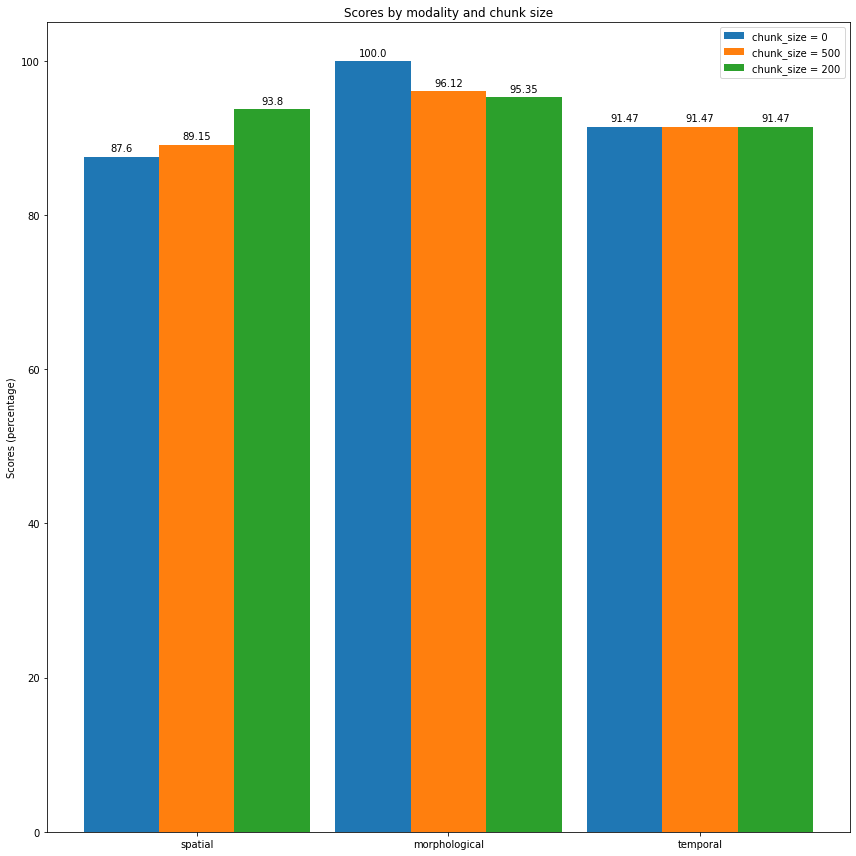

In [36]:
complete = results.loc[:, 'complete', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(complete)

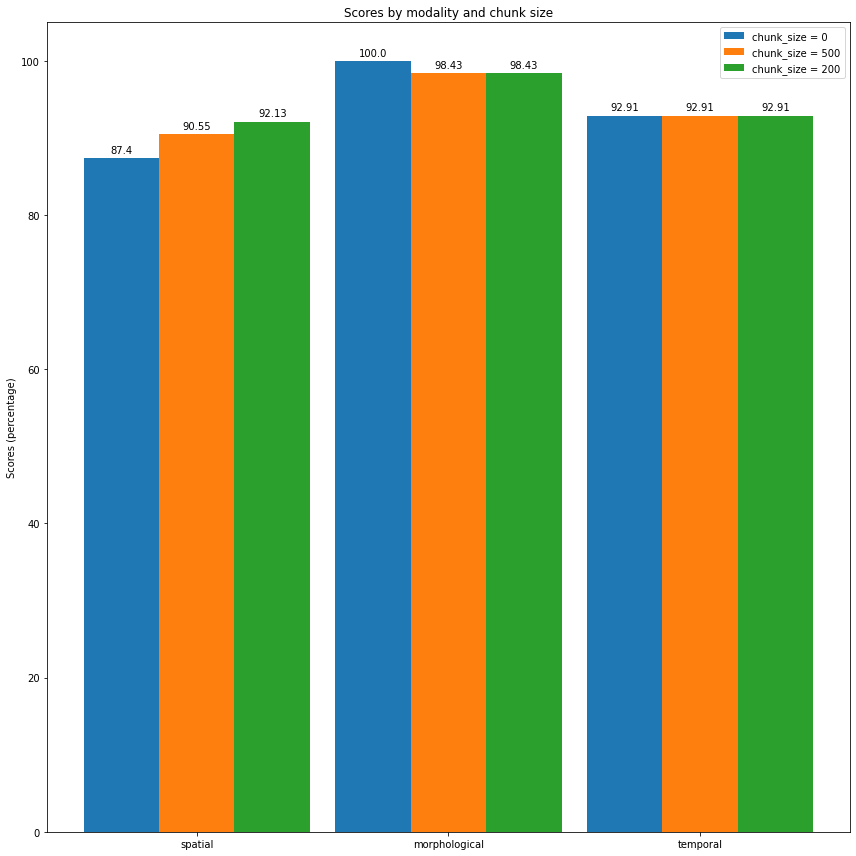

In [37]:
no_noise = results.loc[:, 'no_noise', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_noise)

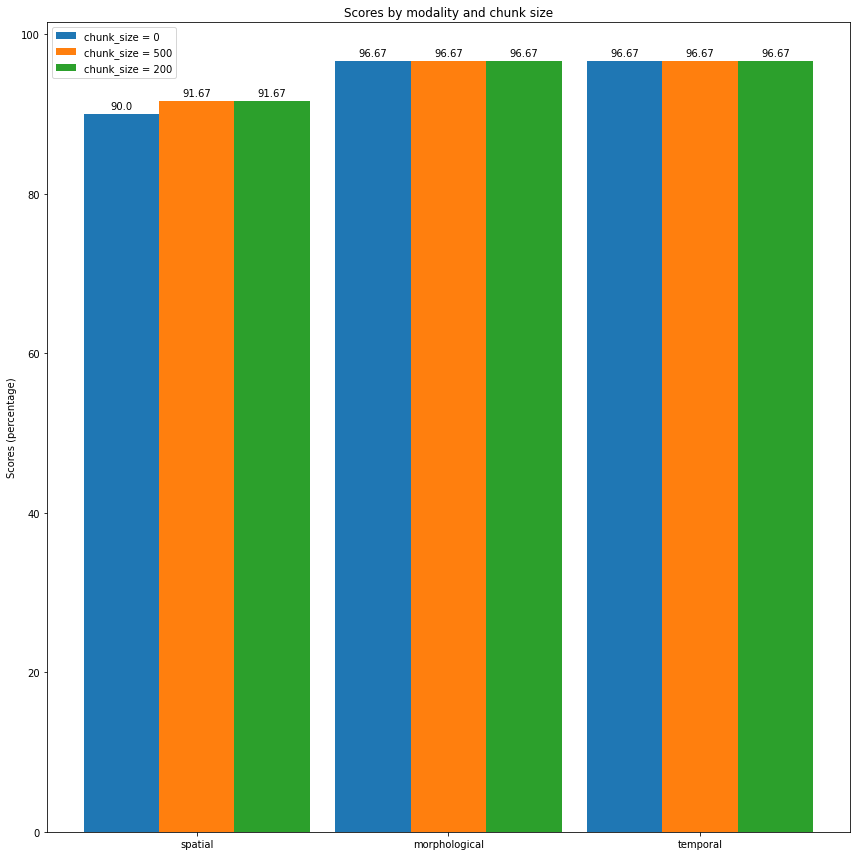

In [38]:
no_small_sample = results.loc[:, 'no_small_sample', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_small_sample)

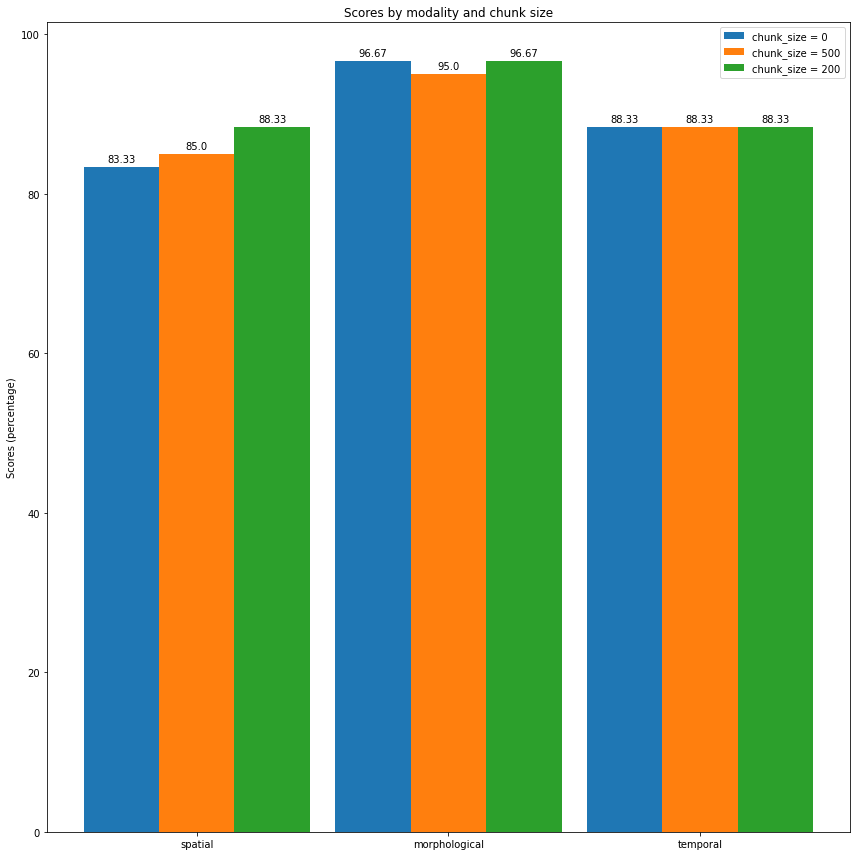

In [39]:
no_noise_nor_ss = results.loc[:, 'no_noise_nor_ss', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_noise_nor_ss)